In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os

In [15]:
datasets = ["mnist", "mnistm", "svhn", "syn", "usps"]
ntl_file_directory = "../../logs/ntl/0/ntl_"
cuti_file_directory = "../../logs/cuti/ntl/0/cuti_"
local_file_directory = "../../logs/resnet18/local/"
ntp_file_directory = "../../logs/resnet18/ntl+lda/admm_"


In [16]:
def extract_floats(s):
    # Regular expression for matching floats
    pattern = r"[-+]?[0-9]*\.?[0-9]+"
    # Find all matches in the string
    matches = re.findall(pattern, s)
    # Convert all matches to float
    floats = [float(match) for match in matches]
    return floats

In [17]:
def read_file(file_path):
    results = {}
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "Data ratio" in line:
                # Get the value after ":"
                line = line.split(":")[2].strip()
                data_ratio = extract_floats(line.split(",")[0].strip())[0]
                data_volume = extract_floats(line.split(",")[1].strip())[0]
                accuracy = extract_floats(line.split(",")[3].strip())[0]
                results[data_ratio] = accuracy
        return results

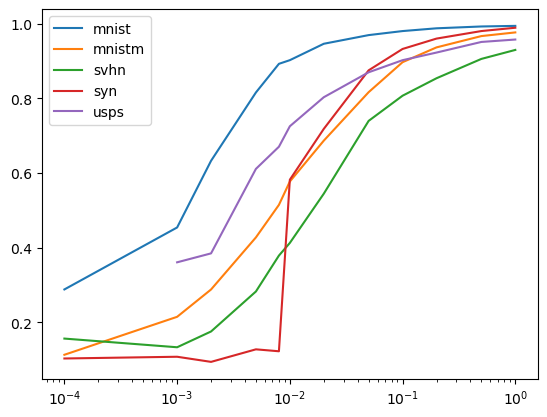

In [18]:
# load the local training results 
for target in datasets:
    file_path = local_file_directory + target + ".log"
    results = read_file(file_path)
    x = list(results.keys())
    y = list(results.values())
    plt.plot(x, y, label=target)
    # x axis log scale 
    plt.xscale("log")
plt.legend()

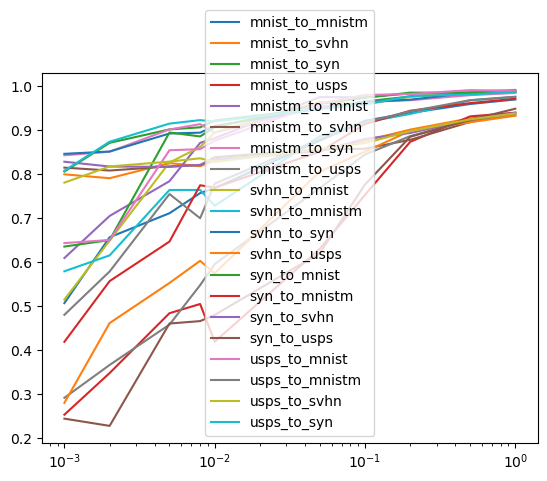

In [19]:
# load ntl transfer learning results
for source in datasets:
    for target in datasets:
        if source == target:
            continue
        file_path = ntl_file_directory + source + "_to_" + target + ".log"
        results = read_file(file_path)
        x = list(results.keys())
        y = list(results.values())
        plt.plot(x, y, label=source + "_to_" + target)
        # x axis log scale 
        plt.xscale("log")
plt.legend()

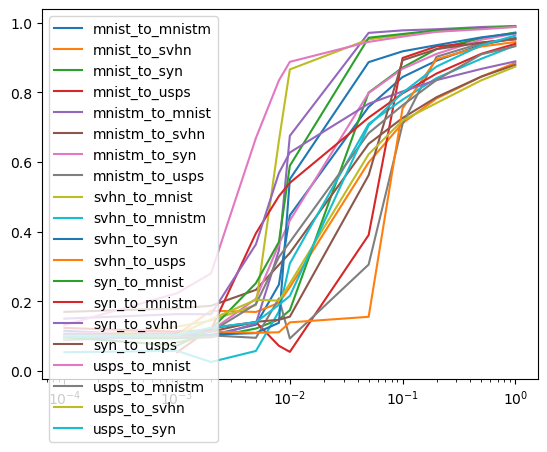

In [20]:
for source in datasets:
    for target in datasets:
        if source == target:
            continue
        file_path = ntp_file_directory + source + "_to_" + target + ".log"
        results = read_file(file_path)
        x = list(results.keys())
        y = list(results.values())
        plt.plot(x, y, label=source + "_to_" + target)
        # x axis log scale 
        plt.xscale("log")
plt.legend()

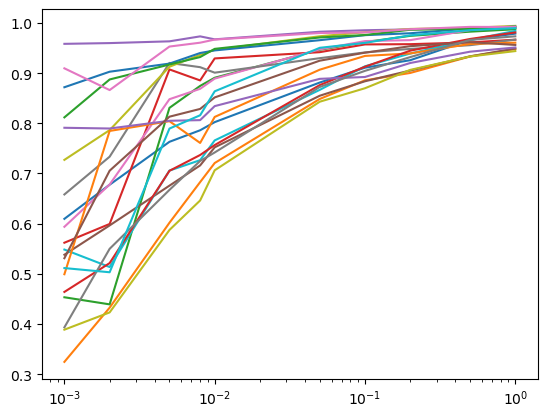

In [21]:
# cuti
for source in datasets:
    for target in datasets:
        if source == target:
            continue
        file_path = cuti_file_directory + source + "_to_" + target + ".log"
        results = read_file(file_path)
        x = list(results.keys())
        y = list(results.values())
        plt.plot(x, y, label=source + "_to_" + target)
        # x axis log scale 
        plt.xscale("log")
plt.show()

In [22]:
def log_auc(xaxis, yaxis):
    auc = 0
    for i in range(1, len(xaxis)):
        # log scale area under the curve
        auc += (np.log(xaxis[i]) - np.log(xaxis[i - 1])) * (yaxis[i] + yaxis[i - 1]) / 2
    return auc

In [23]:
# compute the local AUC for target domains with local training 
local_auc = {}
for target in datasets:
    file_path = local_file_directory + target + ".log"
    results = read_file(file_path)
    x = list(results.keys())
    y = list(results.values())
    local_auc[target] = log_auc(x, y)
    print(target + " local AUC: " + str(log_auc(x, y)))

mnist local AUC: 6.965467036584484
mnistm local AUC: 5.122620219167711
svhn local AUC: 4.367010713897939
syn local AUC: 4.584803735710495
usps local AUC: 5.232009656462087


In [25]:
ntl_aucs = {}
for source in datasets:
    ntl_aucs[source] = {}
    for target in datasets:
        if source == target:
            continue
        file_path = ntl_file_directory + source + "_to_" + target + ".log"
        results = read_file(file_path)
        x = list(results.keys())
        y = list(results.values())
        ntl_aucs[source][target] = log_auc(x, y)
        
        print("ntl", source, target, log_auc(x, y))


ntl mnist mnistm 5.67774460885441
ntl mnist svhn 5.917675610859497
ntl mnist syn 6.450408594971629
ntl mnist usps 4.290705902937313
ntl mnistm mnist 6.155776794002832
ntl mnistm svhn 5.906977604995203
ntl mnistm syn 6.415920399434174
ntl mnistm usps 4.701729712290335
ntl svhn mnist 6.094307310680815
ntl svhn mnistm 5.687659321922877
ntl svhn syn 6.419011306826894
ntl svhn usps 4.892332404734076
ntl syn mnist 6.212996041707777
ntl syn mnistm 5.501115576188956
ntl syn svhn 5.941520471182078
ntl syn usps 4.2276389585238
ntl usps mnist 6.156675253433508
ntl usps mnistm 5.638633865410776
ntl usps svhn 5.936438864424349
ntl usps syn 6.457087873439101


In [26]:
ntp_aucs = {}
for source in datasets:
    ntp_aucs[source] = {}
    for target in datasets:
        if source == target:
            continue
        file_path = ntp_file_directory + source + "_to_" + target + ".log"
        results = read_file(file_path)
        x = list(results.keys())
        y = list(results.values())
        ntp_aucs[source][target] = log_auc(x, y)
        
        print("ntp", source, target, log_auc(x, y))

ntp mnist mnistm 4.216594488996133
ntp mnist svhn 3.618903530519458
ntp mnist syn 4.000087439374859
ntp mnist usps 3.203450883633937
ntp mnistm mnist 4.890906509047309
ntp mnistm svhn 4.067249255579719
ntp mnistm syn 4.409387265022009
ntp mnistm usps 2.993477141424651
ntp svhn mnist 5.252431057185148
ntp svhn mnistm 3.633482774029275
ntp svhn syn 4.512271989100272
ntp svhn usps 2.8746300270955225
ntp syn mnist 4.857424451919989
ntp syn mnistm 4.48739473314892
ntp syn svhn 4.693485865866485
ntp syn usps 3.5227714926314984
ntp usps mnist 5.949089210673403
ntp usps mnistm 3.9951048446097657
ntp usps svhn 3.642131506895588
ntp usps syn 3.884979186539138


In [27]:
cuti_aucs = {}
for source in datasets:
    cuti_aucs[source] = {}
    for target in datasets:
        if source == target:
            continue
        file_path = cuti_file_directory + source + "_to_" + target + ".log"
        results = read_file(file_path)
        x = list(results.keys())
        y = list(results.values())
        cuti_aucs[source][target] = log_auc(x, y)
        
        print("cuti", source, target, log_auc(x, y))

cuti mnist mnistm 5.800467330559958
cuti mnist svhn 5.1695930346114665
cuti mnist syn 5.878693648959496
cuti mnist usps 6.0910715132573126
cuti mnistm mnist 6.743621063601756
cuti mnistm svhn 5.477367486352348
cuti mnistm syn 6.127843861564751
cuti mnistm usps 6.187517182329875
cuti svhn mnist 6.446504630812642
cuti svhn mnistm 5.551182744484526
cuti svhn syn 6.573274221815165
cuti svhn usps 5.921621208011558
cuti syn mnist 6.54958902500349
cuti syn mnistm 5.538345776468785
cuti syn svhn 5.981509638917895
cuti syn usps 5.972253941188545
cuti usps mnist 6.636530914075063
cuti usps mnistm 5.468426147121303
cuti usps svhn 5.134559502152605
cuti usps syn 5.884245257924746


In [31]:
# compute the auc differences as scores
cuti_scores = {}
for source in datasets:
    cuti_scores[source] = {}
    for target in datasets:
        if source == target:
            continue
        cuti_scores[source][target] = cuti_aucs[source][target] - local_auc[target]
        print("cuti", source, target, cuti_scores[source][target])

cuti mnist mnistm 0.6778471113922473
cuti mnist svhn 0.8025823207135279
cuti mnist syn 1.293889913249001
cuti mnist usps 0.8590618567952255
cuti mnistm mnist -0.22184597298272823
cuti mnistm svhn 1.1103567724544092
cuti mnistm syn 1.5430401258542554
cuti mnistm usps 0.9555075258677883
cuti svhn mnist -0.518962405771842
cuti svhn mnistm 0.42856252531681527
cuti svhn syn 1.9884704861046698
cuti svhn usps 0.6896115515494712
cuti syn mnist -0.41587801158099413
cuti syn mnistm 0.41572555730107386
cuti syn svhn 1.6144989250199568
cuti syn usps 0.7402442847264581
cuti usps mnist -0.32893612250942095
cuti usps mnistm 0.34580592795359166
cuti usps svhn 0.7675487882546665
cuti usps syn 1.2994415222142512


In [32]:
# Compute the auc difference as score
for source in datasets:
    for target in datasets:
        if source == target:
            continue
        print("ntl", source, target, ntl_aucs[source][target] - local_auc[target])

ntl mnist mnistm 0.5551243896866991
ntl mnist svhn 1.5506648969615586
ntl mnist syn 1.8656048592611336
ntl mnist usps -0.9413037535247737
ntl mnistm mnist -0.8096902425816523
ntl mnistm svhn 1.5399668910972641
ntl mnistm syn 1.8311166637236784
ntl mnistm usps -0.5302799441717516
ntl svhn mnist -0.8711597259036692
ntl svhn mnistm 0.5650391027551658
ntl svhn syn 1.8342075711163988
ntl svhn usps -0.3396772517280109
ntl syn mnist -0.752470994876707
ntl syn mnistm 0.3784953570212446
ntl syn svhn 1.5745097572841393
ntl syn usps -1.0043706979382874
ntl usps mnist -0.8087917831509763
ntl usps mnistm 0.5160136462430653
ntl usps svhn 1.5694281505264103
ntl usps syn 1.872284137728606


In [33]:
# compute ntp scores 
for source in datasets:
    for target in datasets:
        if source == target:
            continue
        print("ntp", source, target, ntp_aucs[source][target] - local_auc[target])

ntp mnist mnistm -0.906025730171578
ntp mnist svhn -0.7481071833784805
ntp mnist syn -0.5847162963356363
ntp mnist usps -2.0285587728281502
ntp mnistm mnist -2.074560527537175
ntp mnistm svhn -0.29976145831822
ntp mnistm syn -0.17541647068848576
ntp mnistm usps -2.238532515037436
ntp svhn mnist -1.7130359793993364
ntp svhn mnistm -1.4891374451384358
ntp svhn syn -0.0725317466102231
ntp svhn usps -2.3573796293665645
ntp syn mnist -2.108042584664495
ntp syn mnistm -0.6352254860187907
ntp syn svhn 0.3264751519685465
ntp syn usps -1.7092381638305887
ntp usps mnist -1.0163778259110812
ntp usps mnistm -1.1275153745579454
ntp usps svhn -0.7248792070023504
ntp usps syn -0.6998245491713573
